In [1]:
# Pandas library for data analysis
import pandas as pd

# KNNImputer used for imputing the missing values
from sklearn.impute import KNNImputer

# matplotlib for data visualization
import matplotlib.pyplot as plt

# seaborn library for also data visualization
import seaborn as sns

df = pd.read_csv('~/Downloads/Netflix_StrangerThings.csv')


In [2]:
df.head()

,User ID,Day Of Week,Unnamed: 2,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,117752,2/12/19,Tuesday,Stranger Things,2,6,51,Female,1.0,1,NaN,NaN,NaN
1,28615,2/12/19,Tuesday,Stranger Things,2,6,2,Female,0.0,0,NaN,NaN,NaN
2,72226,2/12/19,Tuesday,Stranger Things,2,3,5,Female,0.0,1,NaN,NaN,NaN
3,62565,2/9/19,Saturday,Stranger Things,2,10,59,Female,1.0,1,NaN,NaN,NaN
4,3494,2/12/19,Tuesday,Stranger Things,2,1,33,Female,1.0,0,NaN,NaN,NaN


## Data Cleanup and Preprocessing ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       3033 non-null   int64  
 1   Day Of Week   3033 non-null   object 
 2   Unnamed: 2    3033 non-null   object 
 3   Show          3033 non-null   object 
 4   Season        3033 non-null   int64  
 5   Episode       3033 non-null   int64  
 6   Time Watched  3033 non-null   int64  
 7   Gender        2934 non-null   object 
 8   Completed     2995 non-null   float64
 9   Time of Day   3033 non-null   int64  
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(4), int64(5), object(4)
memory usage: 308.2+ KB


The dataset consists of 13 columns and 3033 rows.

Numerical variabels are Episode, Time Watched, Season and categorical variables are Show, Gender, Completed, Time of Day, Day of week.

In [4]:
# Remove unwanted columns
df = df.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1)
df.head()

,User ID,Day Of Week,Unnamed: 2,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,117752,2/12/19,Tuesday,Stranger Things,2,6,51,Female,1.0,1
1,28615,2/12/19,Tuesday,Stranger Things,2,6,2,Female,0.0,0
2,72226,2/12/19,Tuesday,Stranger Things,2,3,5,Female,0.0,1
3,62565,2/9/19,Saturday,Stranger Things,2,10,59,Female,1.0,1
4,3494,2/12/19,Tuesday,Stranger Things,2,1,33,Female,1.0,0


We can observed that some columns not given names and given wrong names. We will rename it.

In [5]:
# Rename the columns
df = df.rename(columns={'Day Of Week':'Date','Unnamed: 2':'Day Of Week'})
df

,User ID,Date,Day Of Week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,117752,2/12/19,Tuesday,Stranger Things,2,6,51,Female,1.0,1
1,28615,2/12/19,Tuesday,Stranger Things,2,6,2,Female,0.0,0
2,72226,2/12/19,Tuesday,Stranger Things,2,3,5,Female,0.0,1
3,62565,2/9/19,Saturday,Stranger Things,2,10,59,Female,1.0,1
4,3494,2/12/19,Tuesday,Stranger Things,2,1,33,Female,1.0,0
...,...,...,...,...,...,...,...,...,...,...
3028,24988,2/11/19,Monday,American Horror Story,4,2,25,Female,0.0,1
3029,15248,2/11/19,Monday,American Horror Story,4,2,16,Male,0.0,0
3030,4959,2/9/19,Saturday,American Horror Story,2,1,20,Male,0.0,1
3031,28654,2/10/19,Sunday,American Horror Story,5,2,12,Male,0.0,1


In [6]:
# convert date from object to date type
df.Date = pd.to_datetime(df.Date)
type(df.Date)

pandas.core.series.Series

In [7]:
df.dtypes

User ID                  int64
Date            datetime64[ns]
Day Of Week             object
Show                    object
Season                   int64
Episode                  int64
Time Watched             int64
Gender                  object
Completed              float64
Time of Day              int64
dtype: object

### Missing values ####

Let us check missing values are present in the dataset.

In [8]:
# Checking missing values
df.isnull().sum()

User ID          0
Date             0
Day Of Week      0
Show             0
Season           0
Episode          0
Time Watched     0
Gender          99
Completed       38
Time of Day      0
dtype: int64

The missing values are present in the Gender and Completed variable. 

In [9]:
# percentage of missing values
df.isnull().sum()/len(df) * 100

User ID         0.000000
Date            0.000000
Day Of Week     0.000000
Show            0.000000
Season          0.000000
Episode         0.000000
Time Watched    0.000000
Gender          3.264095
Completed       1.252885
Time of Day     0.000000
dtype: float64

The percentage of missing values in Gender and completed are 3.26% and 1.25% respectively.

Percentage of missing values is very less, either we can ignore or we can impute this values by using mean, median and KNN imputation methods.

Both variables Gender and completed are categorical variables. So, we are going to use KNN impuatation method.

In [10]:
# map the Gender values to 0 and 1
df['Gender'] = df.Gender.map({'Female':1,'Male':0})
df['Gender']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3028    1.0
3029    0.0
3030    0.0
3031    0.0
3032    0.0
Name: Gender, Length: 3033, dtype: float64

In [11]:
# KNN impuatation for categorical variables
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df[['Gender','Completed']])
imputed_data

array([[1., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [12]:
# convert numpy array to dataframe

df_imputed = pd.DataFrame(imputed_data, columns=['Gender','Completed'])
df_imputed

,Gender,Completed
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3028,1.0,0.0
3029,0.0,0.0
3030,0.0,0.0
3031,0.0,0.0


In [13]:
# Replace the imputed varaible values to original variable values
df['Gender'] = df_imputed['Gender']
df['Completed'] = df_imputed['Completed']

In [14]:
df.head()

,User ID,Date,Day Of Week,Show,Season,Episode,Time Watched,Gender,Completed,Time of Day
0,117752,2019-02-12,Tuesday,Stranger Things,2,6,51,1.0,1.0,1
1,28615,2019-02-12,Tuesday,Stranger Things,2,6,2,1.0,0.0,0
2,72226,2019-02-12,Tuesday,Stranger Things,2,3,5,1.0,0.0,1
3,62565,2019-02-09,Saturday,Stranger Things,2,10,59,1.0,1.0,1
4,3494,2019-02-12,Tuesday,Stranger Things,2,1,33,1.0,1.0,0


In [15]:
# Checking missing values
df.isnull().sum()

User ID         0
Date            0
Day Of Week     0
Show            0
Season          0
Episode         0
Time Watched    0
Gender          0
Completed       0
Time of Day     0
dtype: int64

### Duplicates ####

In [16]:
df.duplicated().sum()

0

No duplicated are found in dataset.

### Outliers/Anomalies ###

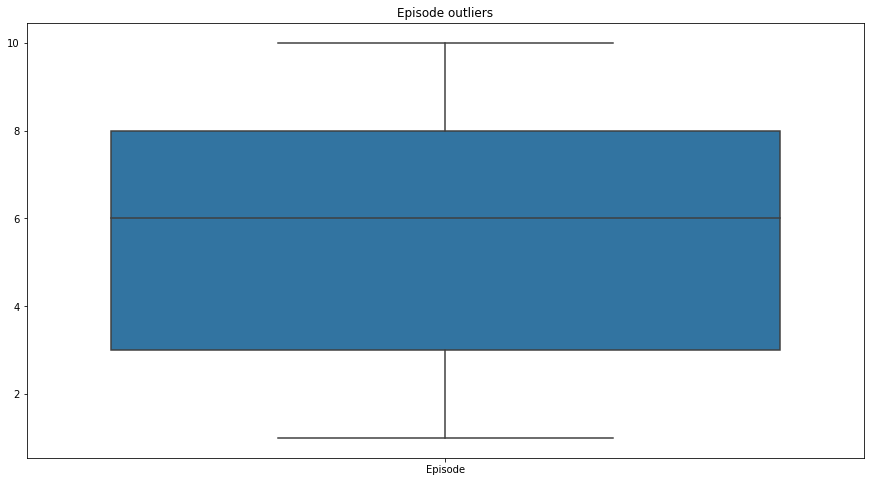

In [17]:
# outliers in Episode 
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for Episode
sns.boxplot(data=df[['Episode']])
ax.set_title('Episode outliers')
plt.show()

No outliers are present in this Episode variable.

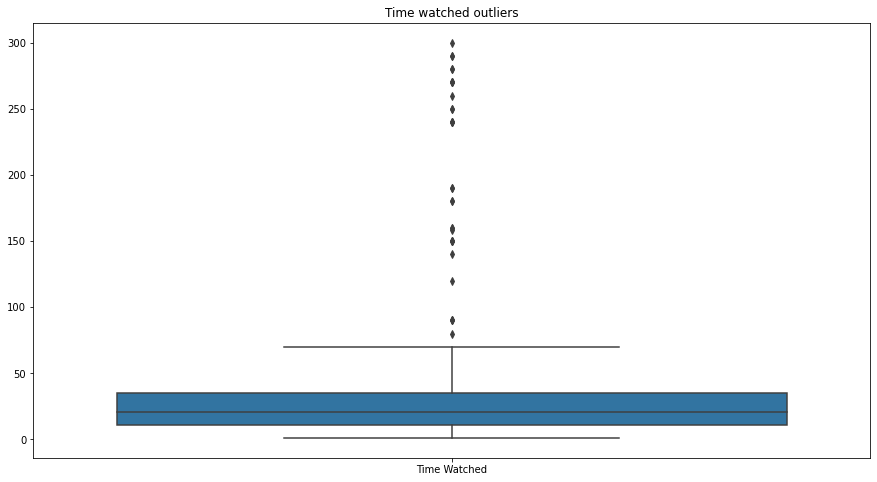

In [18]:
# Outliers in Time watched
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for Time wathced
sns.boxplot(data=df[['Time Watched']])
ax.set_title('Time watched outliers')
plt.show()

Outliers are present in the Time watched variable. But, for this kind of dataset we can ignore outlier analysis and not so important.

## Exploratory Data Analysis ##

Let us see summary statistics like mean, median, mode, count etc.

In [19]:
# Glimpse of the dataset
df.describe()

,User ID,Season,Episode,Time Watched,Gender,Completed,Time of Day
count,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000
mean,62270.860534,2.792944,5.500495,26.018464,0.512034,0.267722,0.495549
std,36111.588500,1.826943,2.886385,25.513932,0.499938,0.440605,0.500063
min,66.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30885.000000,1.000000,3.000000,11.000000,0.000000,0.000000,0.000000
50%,61904.000000,2.000000,6.000000,21.000000,1.000000,0.000000,0.000000
75%,93874.000000,4.000000,8.000000,35.000000,1.000000,1.000000,1.000000
max,124938.000000,10.000000,10.000000,300.000000,1.000000,1.000000,1.000000


### Corrleation Matrix ###

Let us see the correlation between the variables

In [20]:
# correlation matrix
df.corr()

,User ID,Season,Episode,Time Watched,Gender,Completed,Time of Day
User ID,1.000000,0.001829,0.022352,0.000068,0.006073,0.005453,0.005892
Season,0.001829,1.000000,-0.006861,-0.115747,-0.007021,-0.215260,0.003323
Episode,0.022352,-0.006861,1.000000,-0.002347,-0.016518,0.009491,0.010456
Time Watched,0.000068,-0.115747,-0.002347,1.000000,0.006809,0.477213,0.001868
Gender,0.006073,-0.007021,-0.016518,0.006809,1.000000,0.013817,-0.003414
Completed,0.005453,-0.215260,0.009491,0.477213,0.013817,1.000000,-0.016295
Time of Day,0.005892,0.003323,0.010456,0.001868,-0.003414,-0.016295,1.000000


Let us plot correlation matrix

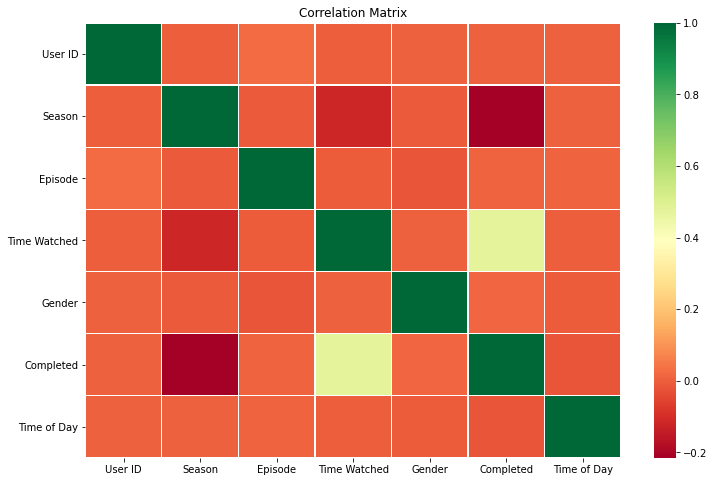

In [21]:

plt.figure(figsize = (12,8))
df_corr = df.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.title('Correlation Matrix')
plt.show()

We can observed that, there is less correlation betwteen variables 

### Univariate Analysis

Text(0.5, 1.0, 'Count Plot for Day of Week variable')

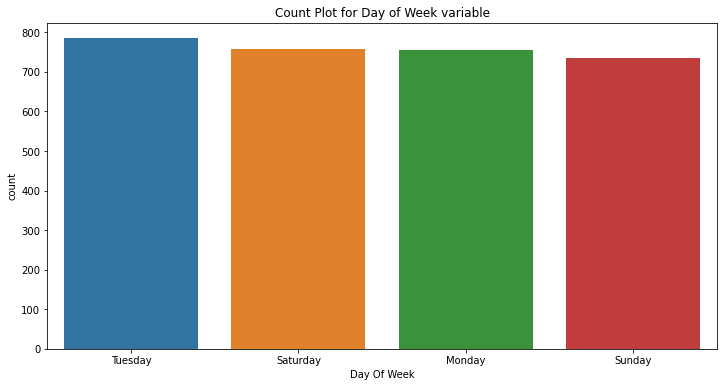

In [22]:
# Count plot for Day Of Week
plt.figure(figsize = (12,6))
sns.countplot(x='Day Of Week', data=df)
plt.title('Count Plot for Day of Week variable')

From the count plot, we can observed that many users watched Netflix shows on Tuesday and followed by Saturday, Monday and Sunday.

Text(0.5, 1.0, 'Count Plot for Show variable')

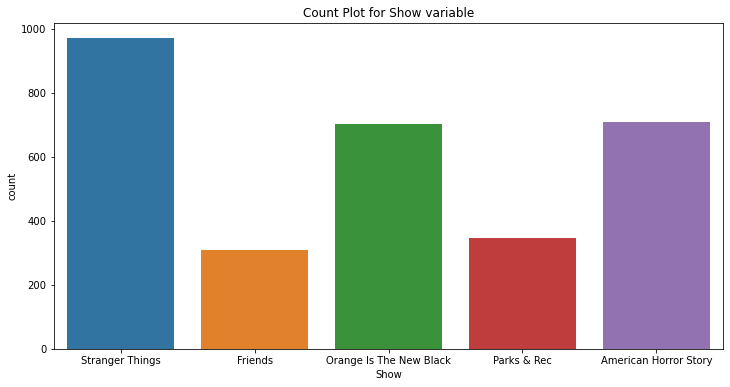

In [23]:
# Count plot for Show
plt.figure(figsize = (12,6))
sns.countplot(x='Show', data=df)
plt.title('Count Plot for Show variable')

From the count plot, we can observed that the Netflix shows which are watched most are Stranger Things, Orange Is The New Black and American Horror Story.

Text(0.5, 1.0, 'Count Plot for Gender variable')

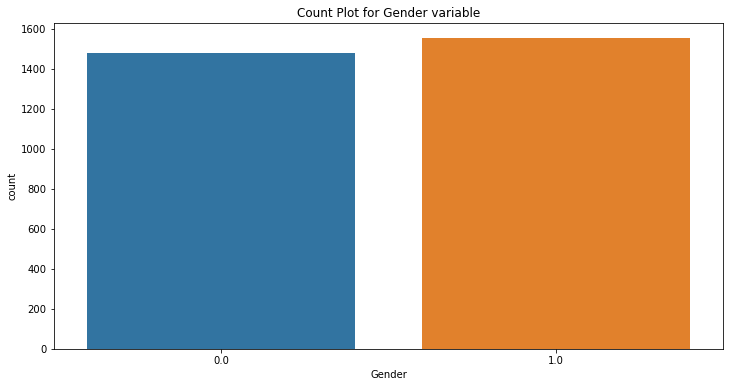

In [24]:
# Count plot for Show
plt.figure(figsize = (12,6))
sns.countplot(x='Gender', data=df) ## Male:0, Female:1
plt.title('Count Plot for Gender variable')

From the count plot, we can observed that most female users watched Netflix shows than male users.

Text(0.5, 1.0, 'Count Plot for Completd variable')

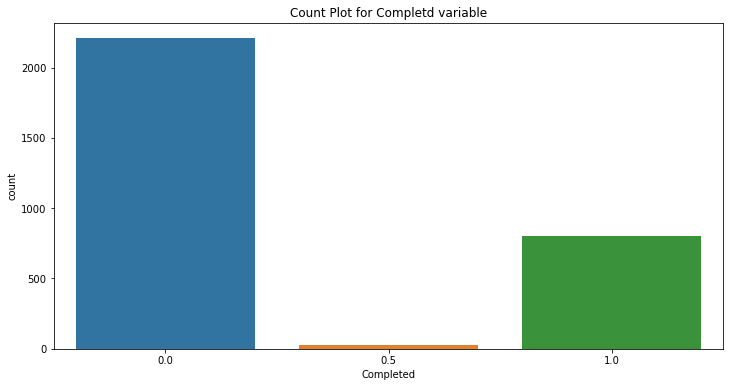

In [25]:
# Count plot for Completed
plt.figure(figsize = (12,6))
sns.countplot(x='Completed', data=df)
plt.title('Count Plot for Completd variable')

From the count plot, we can observed that most users are not completed watching Netflix shows, followed by users who are completed watching Netflix shows and users who are watched 50% of Netflix shows. 

Text(0.5, 1.0, 'Count Plot for Time of Day variable')

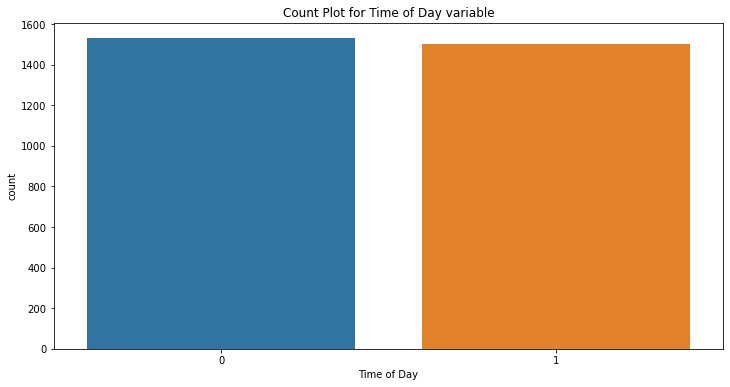

In [26]:
# Count plot for Time of Day
plt.figure(figsize = (12,6))
sns.countplot(x='Time of Day', data=df)
plt.title('Count Plot for Time of Day variable')

From the count plot, we can observed that many users are watched Netflix shows in night than day time.

### Bivariate Analysis ###

Text(0.5, 1.0, 'Stacked bar plot between Show and Time watched variable for given Gender')

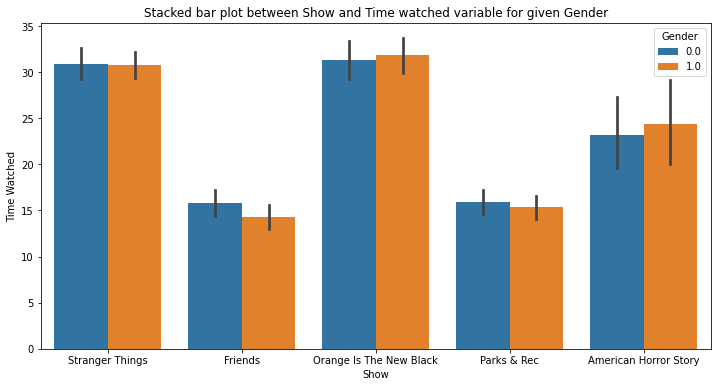

In [27]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Show',y='Time Watched', data=df,hue='Gender')
plt.title('Stacked bar plot between Show and Time watched variable for given Gender')

From the stacked bar chart, we can observed that it tells about the length of the Netfliz shows episodes. The each episode length of Orange is The New Black is more than the other Netflix shows episodes.

Text(0.5, 1.0, 'Stacked bar plot between Show and Time watched variable for given Time of Day')

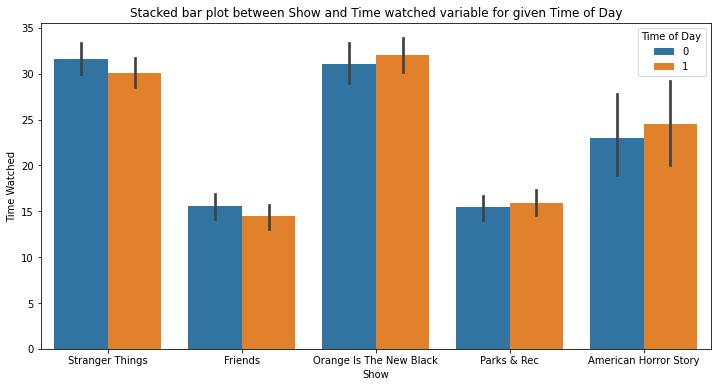

In [28]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Show',y='Time Watched', data=df, hue='Time of Day')
plt.title('Stacked bar plot between Show and Time watched variable for given Time of Day')

From the stacked bar chart, we can observed that it tells about the length of the Netfliz shows episodes and time of day it means that whether they watched shows in night or day time.

Text(0.5, 1.0, 'Stacked bar plot between Show and Time watched variable for given Completed')

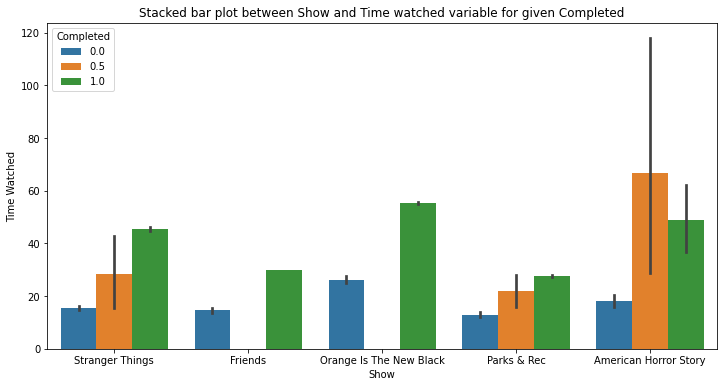

In [29]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Show',y='Time Watched', data=df,hue='Completed')
plt.title('Stacked bar plot between Show and Time watched variable for given Completed')

From the stacked bar chart, we can observed that it tells about the length of the Netfliz shows episodes and completed or not it means that users completed the watching shows or not or 50% completed.

Text(0.5, 1.0, 'Stacked bar plot between Day of Week and Time watched variable for given Time of Day')

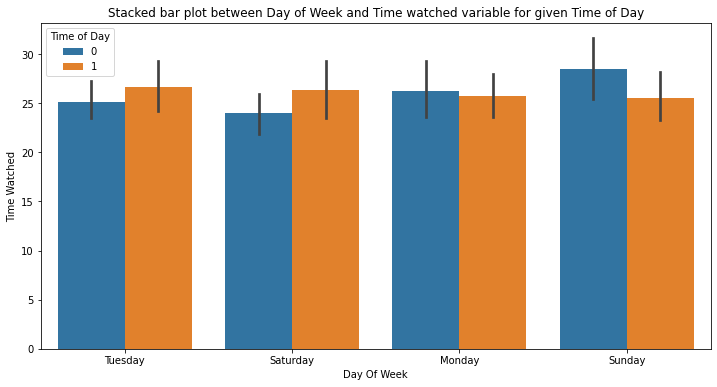

In [30]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Day Of Week',y='Time Watched', data=df, hue='Time of Day')
plt.title('Stacked bar plot between Day of Week and Time watched variable for given Time of Day')

From the stacked bar chart, we can observed that it tells about the pattern of users watched Netflix shows in each day of week and time of day it means that whether user are watched shows in night or day time.

Text(0.5, 1.0, 'Stacked bar plot between Day of Week and Time watched variable for given Gender')

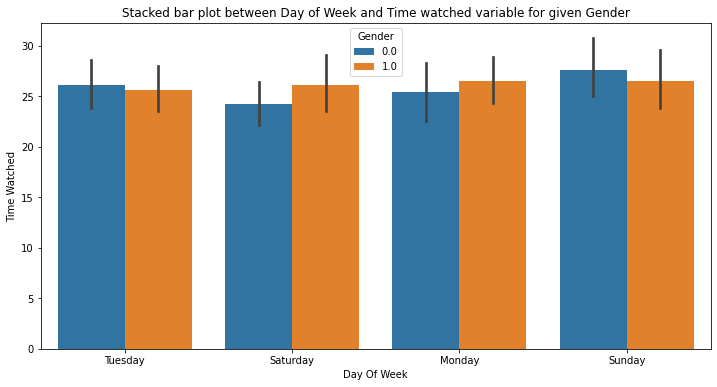

In [31]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Day Of Week',y='Time Watched', data=df, hue='Gender')
plt.title('Stacked bar plot between Day of Week and Time watched variable for given Gender')

From the stacked bar chart, we can observed that it tells about the pattern of users watched Netflix shows in each day of week and Male and female users watched shows pattern in each day of week.